#**Laboratorio N° 04 - Parte práctica**

*   La evaluación es estrictamente personal.
*   Debe resolver todo el cuestionario en el presente cuaderno virtual.
*   Debe renombrar el archivo como *L4_CODIGOPUCP.ipynb*, siendo *CODIGOPUCP* su código PUCP. No debe colocar literalmente *CODIGOPUCP*.
*   Debe mantener una redacción adecuada y libre de errores ortográficos.
* Cualquier incumplimiento de las indicaciones amerita una penalización en su nota.

##**Pregunta 1** (12.5 pts)

Dada la siguiente expresión,

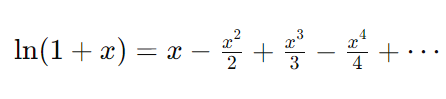

realizar lo siguiente:

1. (2 pts) Implementar la función *Ln(1+x)*, expresada como serie de McLaurin (la sumatoria mostrada en la imagen), en python. Esta función debe tener dos argumentos de entrada, el primero debe ser el valor de X como tal y el segundo la precisión, es decir, la cantidad de términos que se tienen que considerar para la sumatoria.

In [2]:
def py_McLaurin(x, precision):
  suma = 0.0
  for i in range(precision):
    suma = suma + (((-1)**i)*(x**(i+1)))/(i+1)
  return suma

2. (1 pt) Implementar lo mismo de la primera pregunta, pero en lenguaje C.

In [3]:
%%file McLaurin.c

#include<math.h>

double c_McLaurin(double x, int precision){
    double suma;
    for(int i=0; i<precision;i++){
        suma = suma + (pow(-1,i)*pow(x,i+1))/(i+1);
    }
    return suma;
}

Writing McLaurin.c


3. (2 pts) Realizar el llamado de la función en C haciendo uso del módulo Ctypes en python. Además, comentar qué hace cada línea de código. Adicionalmente, explicar el motivo del tipo de variable escogido para cada parámetro de la función.

In [6]:
! gcc -shared -fPIC McLaurin.c -o McLaurin.so -lm

4. (0.5 pt) Ejecutar ambas funciones con un valor de X igual a 0.5 y una precisión de 20. Hallar el tiempo de ejecución de cada una. ¿Cuál es la función más rápida?¿Por qué? Fundamente su respuesta. *Sugerencia: usar la función perf_counter() para mayor precisión.*

In [ ]:
import ctypes
import time

if __name__ == '__main__':
  lib = ctypes.CDLL('./McLaurin.so')
  lib.c_McLaurin.argtypes = [ctypes.c_double, ctypes.c_int]
  lib.c_McLaurin.restype = ctypes.c_double

  x = 0.5
  precision = 20

  tic = time.perf_counter()
  c_value = lib.c_McLaurin(x,precision)
  toc = time.perf_counter()
  c_time = (toc - tic)*1e6

  tic = time.perf_counter()
  py_value = py_McLaurin(x,precision)
  toc = time.perf_counter()
  py_time = (toc - tic)*1e6

  print(f"El valor calculado en C es: {c_value}")
  print(f"El valor calculado en Python es: {py_value}")
  print(f"El tiempo de ejecución en C es: {c_time} us")
  print(f"El tiempo de ejecución en Python es: {py_time} us")
  print(f"Error: {c_value-py_value}")

El valor calculado en C es: 0.4054650927341771
El valor calculado en Python es: 0.4054650927341771
El tiempo de ejecución en C es: 15.922000784485135 us
El tiempo de ejecución en Python es: 21.62100008717971 us
Error: 0.0


**Comentario:** La función más rápida es la de C. Ello se debe a que el programa en C es compilado, es decir que se está ejecutando un código en lenguaje máquina. En cambio el programa en Python es interpretado, es decir que un intérprete lo lee y lo ejecuta línea por línea. Asimismo, C es un lenguaje de bajo nivel, por lo que interacciona de manera más cercana con el hardware. Ello en comparación con Python que, al ser de alto nivel, consume más recursos según le convenga y, en consecuencia, tarda más.

5. (0.5 pts) ¿Los resultados de ejecutar ambas funciones son iguales? En caso de no ser así, ¿Por qué son distintas? Justifique su respuesta. Precisión 20

**Comentario:** Los resultados al ejecutar ambas funciones para x = 0.5 y precision = 20 son exactamente iguales tal como lo indica el error igual a 0.0

6. (1.5 pts) Graficar los resultados para una precision que varía desde 20 a 40. ¿Son las gráficas iguales?¿Por qué? Aumentar de 1 en 1

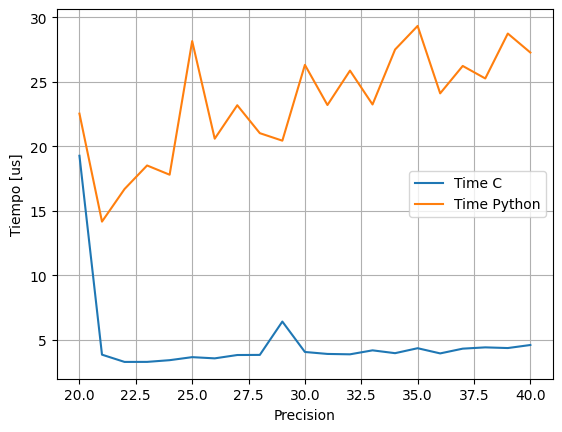

In [ ]:
import ctypes
import time
import matplotlib.pyplot as plt

if __name__ == '__main__':
  lib = ctypes.CDLL('./McLaurin.so')
  lib.c_McLaurin.argtypes = [ctypes.c_double, ctypes.c_int]
  lib.c_McLaurin.restype = ctypes.c_double

  x = 0.5
  c_list = []
  py_list = []
  for precision in range(20,41):
    tic = time.perf_counter()
    c_value = lib.c_McLaurin(x,precision)
    toc = time.perf_counter()
    c_time = (toc - tic)*1e6
    c_list.append(c_time)

    tic = time.perf_counter()
    py_value = py_McLaurin(x,precision)
    toc = time.perf_counter()
    py_time = (toc - tic)*1e6
    py_list.append(py_time)

  plt.plot(range(20,41),c_list)
  plt.plot(range(20,41),py_list)
  plt.grid()
  plt.legend(["Time C","Time Python"])
  plt.xlabel("Precision")
  plt.ylabel("Tiempo [us]")

**Comentario:** No son iguales, porque el programa en Python tiene un mayor tiempo de ejecución que el programa en C. Asimismo, conforme se aumenta la precision el programa en Python, se vuelve más lento con relación al programa en C.

7. (1.5 pt) Realizar un análisis temporal de las 2 funciones. Para ello se solicita hallar los tiempos de ejecución de cada una para 50 iteraciones. Hallar e imprimir la mediana como valor representativo del tiempo de ejecucion. Precisión 20

In [ ]:
import ctypes
import time
import statistics

if __name__ == '__main__':
  lib = ctypes.CDLL('./McLaurin.so')
  lib.c_McLaurin.argtypes = [ctypes.c_double, ctypes.c_int]
  lib.c_McLaurin.restype = ctypes.c_double

  x = 0.5
  precision = 20
  c_list = []
  py_list = []
  iter = 50
  for _ in range(iter):
    tic = time.perf_counter()
    c_value = lib.c_McLaurin(x,precision)
    toc = time.perf_counter()
    c_time = (toc - tic)*1e6
    c_list.append(c_time)

    tic = time.perf_counter()
    py_value = py_McLaurin(x,precision)
    toc = time.perf_counter()
    py_time = (toc - tic)*1e6
    py_list.append(py_time)

print(f"La mediana de los tiempos de ejecución en C es: {statistics.median(c_list)} ns")
print(f"La mediana de los tiempos de ejecución en Python es: {statistics.median(py_list)} ns")
print(f"Mediana de tiempos en Python - Mediana de tiempos en C = {statistics.median(py_list)-statistics.median(c_list)}")

La mediana de los tiempos de ejecución en C es: 6.830000074842246 ns
La mediana de los tiempos de ejecución en Python es: 13.473500530380988 ns
Mediana de tiempos en Python - Mediana de tiempos en C = 6.643500455538742


**Comentario:** Por lo tanto, ya que la mediana de tiempos en Python es mayor que la mediana de tiempos en C, el programa de C es más rápido,

8. (1.5 pts) Graficar los tiempos de ejecución a lo largo de las iteraciones. Comentar sobre la evolución de los tiempos de ejecución y explicar por qué se da de esa manera. Una vez más, ¿Cuál es la función más rápida?

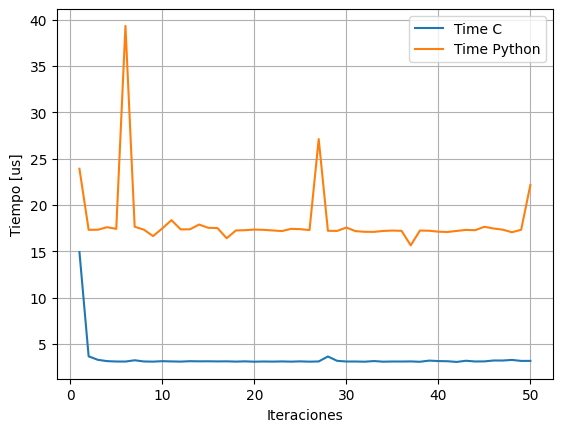

In [ ]:
import ctypes
import time
import statistics

if __name__ == '__main__':
  lib = ctypes.CDLL('./McLaurin.so')
  lib.c_McLaurin.argtypes = [ctypes.c_double, ctypes.c_int]
  lib.c_McLaurin.restype = ctypes.c_double

  x = 0.5
  precision = 20
  c_list = []
  py_list = []
  iter = 50
  for _ in range(iter):
    tic = time.perf_counter()
    c_value = lib.c_McLaurin(x,precision)
    toc = time.perf_counter()
    c_time = (toc - tic)*1e6
    c_list.append(c_time)

    tic = time.perf_counter()
    py_value = py_McLaurin(x,precision)
    toc = time.perf_counter()
    py_time = (toc - tic)*1e6
    py_list.append(py_time)

  plt.plot(range(1,iter+1),c_list)
  plt.plot(range(1,iter+1),py_list)
  plt.grid()
  plt.legend(["Time C","Time Python"])
  plt.xlabel("Iteraciones")
  plt.ylabel("Tiempo [us]")

**Comentario:** Para empezar, podemos notar que el tiempo de ejecución no se mantiene exactamente igual (aunque la mayoría de veces se obtienen valores próximos) a pesar de que se está ejecutando lo mismo en cada iteración, ello se puede deber a procesos en segundo plano que se están ejecutando y generan valores atípicos. Podemos notar que la función en C es más rápida, pues en la 50 interaciones su tiempo de ejecución fue significativamente mejor.

9. (1 pt) Calcular y graficar el SpeedUp a lo largo de las iteraciones. ¿La gráfica muestra siempre valores mayores o iguales a 1? En caso de no ser así, ¿Por qué?

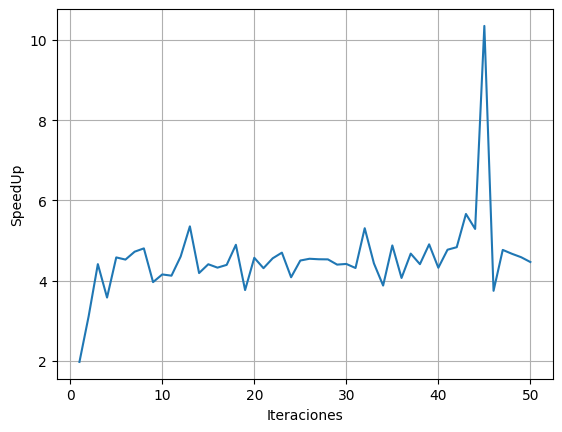

In [ ]:
import ctypes
import time
import statistics

if __name__ == '__main__':
  lib = ctypes.CDLL('./McLaurin.so')
  lib.c_McLaurin.argtypes = [ctypes.c_double, ctypes.c_int]
  lib.c_McLaurin.restype = ctypes.c_double

  x = 0.5
  precision = 20
  speedup_list =[]
  iter = 50
  for _ in range(iter):
    tic = time.perf_counter()
    c_value = lib.c_McLaurin(x,precision)
    toc = time.perf_counter()
    c_time = (toc - tic)*1e6

    tic = time.perf_counter()
    py_value = py_McLaurin(x,precision)
    toc = time.perf_counter()
    py_time = (toc - tic)*1e6

    speedup_list.append(py_time/c_time)

  plt.plot(range(1,iter+1),speedup_list)
  plt.grid()
  plt.xlabel("Iteraciones")
  plt.ylabel("SpeedUp")

**Comentario:** Sí, la gráfica muestra siempre valor mayores o iguales a 1, es decir que el programa en C es más rápido que el programa en Python en todas la iteraciones.

10. (1 pt) ¿Cuál es el valor óptimo para que se obtenga una precisión del 99.9% considerando que el valor real de *Ln(1.5)* es *0.405465* ?. Explique el procedimiento seguido para hallar el valor óptimo.

In [26]:
import ctypes
import time
import statistics

if __name__ == '__main__':
  lib = ctypes.CDLL('./McLaurin.so')
  lib.c_McLaurin.argtypes = [ctypes.c_double, ctypes.c_int]
  lib.c_McLaurin.restype = ctypes.c_double

  x = 0.5
  precision = 1
  error = 1000
  while error > 0.001:
    c_value = lib.c_McLaurin(x,precision)

    error = abs(0.405465-c_value)/0.405465

    precision = precision + 1


  print(f"El valor óptimo para la precisión en C es: {precision-1}")

El valor óptimo para la precisión en C es: 7


Se introdujo una variable error para calcular el error relativo en cada iteración conforme se aumentaba la precisión, de este modo al lograr la presición deseada se detenía el bucle while. Solo se consideró el valor obtenido a partir de la función en C, puesto que como se vió en un inciso anterior el valor que se obtiene con el programa en python es el mismo

##**Pregunta 2** (3.5 pts)

Se brinda la siguiente porción de código en C:

In [ ]:
%%file func.c

void func(double *a, double *b, double *c, double *d, int N)
{
    for (int i = 0; i<N; i++)
    {
        d[i] = a[i] * b[i] - c[i];
    }
}

Writing func.c


Compilar y mostrar el código desensamblado con los siguientes comandos:

In [ ]:
! gcc -Os -c func.c -o func.o
! objdump -M intel -j .text -D func.o


func.o:     file format elf64-x86-64


Disassembly of section .text:

0000000000000000 <func>:
   0:	f3 0f 1e fa          	endbr64 
   4:	31 c0                	xor    eax,eax
   6:	41 39 c0             	cmp    r8d,eax
   9:	7e 19                	jle    24 <func+0x24>
   b:	f2 0f 10 04 c7       	movsd  xmm0,QWORD PTR [rdi+rax*8]
  10:	f2 0f 59 04 c6       	mulsd  xmm0,QWORD PTR [rsi+rax*8]
  15:	f2 0f 5c 04 c2       	subsd  xmm0,QWORD PTR [rdx+rax*8]
  1a:	f2 0f 11 04 c1       	movsd  QWORD PTR [rcx+rax*8],xmm0
  1f:	48 ff c0             	inc    rax
  22:	eb e2                	jmp    6 <func+0x6>
  24:	c3                   	ret    


1. (1 pt) Determinar el número de instrucciones totales. Generalizar con una fórmula para cualquier valor de N.

Para N = 0: #instrucciones = 5

Para N = 1: #instrucciones = 13

Para N = 2: #instrucciones = 21

Para N = 3: #instrucciones = 29

Para N = 4: #instrucciones = 37

Por inferencia se obtiene que: **#instrucciones = 5 + 8N**

Complete la línea de código solicitada en la función *calc_num_instr* :

In [ ]:
%%file test.c

#include <x86intrin.h>
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

double* crear_arr (int N)
{
    double *v = (double*)malloc(sizeof(double)*N);
    for (int i = 0; i<N ;i++)
    {
        v[i] = rand() % 9;
    }
    return v;
}

void fill_arr(int *v, int N)
{
    for (int i = 0; i<N; i++)
    {
        v[i] = rand() % 9;
    }
}

int calc_num_instr (int N)
{
    int num_instr;

    num_instr = 5 + 8*N;

    return num_instr;
}

void func(double *a, double *b, double *c, double *d, int N)
{
    for (int i = 0; i<N; i++)
    {
        d[i] = a[i] * b[i] - c[i];
    }
}

double calcular_CPI(long int num_cic, int num_inst)
{
    return (double)num_cic/(double)num_inst;
}

int main()
{
    srand(time(NULL));

    int N = 8;
    double* a = crear_arr(N);
    double* b = crear_arr(N);
    double* c = crear_arr(N);
    double* d = crear_arr(N);

    long tic, toc, ciclos;

    tic = __rdtsc();
    func(a,b,c,d,N);
    toc = __rdtsc();

    ciclos = toc - tic;

    int num_instr = calc_num_instr(N);

    double CPI = calcular_CPI(ciclos, num_instr);

    printf("# instrucciones: %d \n", num_instr);
    printf("ciclos: %ld \n", ciclos);
    printf("CPI promedio: %lf\n", CPI);
    return 0;
}

Overwriting test.c


In [ ]:
! gcc test.c -o test & ./test

# instrucciones: 69 
ciclos: 266 
CPI promedio: 3.855072


Compilar, ejecutar el programa y responder las preguntas:

2. (1.5 pts) Explique detalladamente el procedimiento de cómo se halló el valor del CPI promedio e indique cuál es su valor (debe explicar la utilidad de la función  *__rdtsc()* ). Adicionalmente, hallar el tiempo de ejecución calculado por definición.

**Respuesta:** Para hallar el CPI promedio se dividió el número de instrucciones del programa entre los ciclos de reloj que tomó su ejecución. Por un lado, para hallar el número de instrucciones se utilizó la fórmula generalizada para calcular el número de instrucciones para cualquier valor de N. Por otro lado, para hallar los ciclos de reloj se empleo la función *__rdtsc()* de la librería *x86intrin.h*. Esta función retorna el conteo del número de ciclos del CPU desde su último reinicio; de modo que al guardar este conteo de ciclos tanto justo antes como justo después de la ejecución de la función *func* en las variables tic y toc respectivamente, se puede obtener el número de ciclos que tomó la ejecución del programa mediante la diferencia *toc - tic*.

In [ ]:
! lscpu | grep "GHz"

Model name:                         Intel(R) Xeon(R) CPU @ 2.20GHz


El tiempo de ejecución por definición es T = Ciclos/Frecuencia = 266/(2.2 X 10⁹) = **120,909090909 us**

3. (1 pt) Con sus propias palabras, ¿Cómo está relacionada CPI con MIPS y FLOPS? Hallar el valor de los MIPS y los FLOPS del programa.

Para empezar, los MIPS son millones de instrucciones por segundo, es decir que si se tiene un CPI mayor, entonces los MIPS serán menores; ello se debe a que se requerirán más ciclos para ejecutar una instrucción y, en consecuencia, también más tiempo. De manera similar, los FLOPS son operaciones de punto flotante por segundo, por lo cual si se tiene un mayor CPI los FLOPS serán menores.

MIPS = #instrucciones/(Texec X 10^6) = 69/(120,909090909 X (10^(-3))) = **570,676691729**

Para hallar los FLOPS primero debemos hallar la fórmula para #flops:

Para N = 0: #flops = 0

Para N = 1: #flops = 4

Para N = 2: #flops = 8

Por inferencia: #flops = 4N

Para N = 8 (valor asignado en el programa), se tiene: #flops = 32

FLOPS = #flops/(Texec X 10^6) = 32/(120,909090909 X (10^(-3))) = **264,661654135**